In [1]:
import word2vec

In [2]:
model = word2vec.load('en_tokenized.bin')
print model.vectors.shape

(1832169, 100)


Demonstrate how to get closest word vectors.

In [3]:
indexes, metrics = model.cosine('wine')
print [x.encode("utf-8") for x in model.vocab[indexes]]

['wines', 'amarone', 'liqueurs', 'liqueur', 'grapes', 'grape', 'tokaji', 'zinfandel', 'ros\xc3\xa9', 'cordials']


In [4]:
model_ch = word2vec.load('ch_tokenized.bin')
print model_ch.vectors.shape

(14984, 100)


The Chinese character '晚' means **evening** or **late**. Its closest characters in the vector space contain: 'noon', 'early', 'end', 'morning', 'night', 'beginning'..., which is a combination of some words that are closest to 'evening' and 'late' in English.

In [5]:
indexes, metrics = model_ch.cosine('晚'.decode("utf-8"))
print 'Characters that are close to "晚" in Chinese:'
l = list()
for i in model_ch.vocab[indexes]:
    print i.encode("utf-8")
    
indexes, metrics = model.cosine('evening')
print 'Words that are close to "Evening" in English:'
print [x.encode("utf-8") for x in model.vocab[indexes]]

indexes, metrics = model.cosine('late')
print 'Words that are close to "Late" in English:'
print [x.encode("utf-8") for x in model.vocab[indexes]]

Characters that are close to "晚" in Chinese:
午
早
週
逢
末
晨
映
夜
初
☸
Words that are close to "Evening" in English:
['afternoon', 'morning', 'night', 'sunday', 'lunchtime', 'mid-day', 'forenoon', 'saturday', 'day', 'thursday']
Words that are close to "Late" in English:
['early', 'mid', 'mid-to-late', 'mid-late', 'mid/late', 'beginning', 'early-to-mid', 'early-mid', 'early/mid', 'onwards']


The Chinese character '药' means **medicine**. The closest Chinese characters contain the traditional Chinese version and some other version of the character, but also 'drug', 'smoke', and a few characters that represents processes of making Chinese medicines. But the closest English words are just different branches of medicinal practices. Interesting differences.

In [6]:
indexes, metrics = model_ch.cosine('药'.decode("utf-8"))
for i in model_ch.vocab[indexes]:
    print i.encode("utf-8")
    
indexes, metrics = model.cosine('medicine')
print [x.encode("utf-8") for x in model.vocab[indexes]]

藥
剂
质
葯
烧
碱
烟
毒
酱
腌
['dentistry', 'dermatology', 'osteopathy', 'pharmacology', 'naturopathy', 'cardiology', 'ophthalmology', 'neurology', 'pediatrics', 'psychiatry']


The Chinese character '酒' means **alcohol**. **This one is super interesting** because the closest English words are all related drugs which very often people intake both at the same time. However, in China, drug has never been super popular (except opium in the recent history), but people love drink alcohol while eating! So the closest meaning characters include: 'rice', 'congee'/'porridge'(another food), 'meal'... How fun!!


In [7]:
indexes, metrics = model_ch.cosine('酒'.decode("utf-8"))
for i in model_ch.vocab[indexes]:
    print i.encode("utf-8")
    
indexes, metrics = model.cosine('alcohol')
print [x.encode("utf-8") for x in model.vocab[indexes]]

飯
饭
吆
舗
醺
酝
餐
粥
醞
酊
['cannabis', 'caffeine', 'amphetamines', 'nicotine', 'drugs', 'oxycodone', 'opiates', 'marijuana', 'smoking', 'cocaine']


The Chinese character '鞋' means **shoe**. Though both English and Chinese give words/character that are physics objects, Chinese gives: boots, hats, dresses, pants, boxes, mats... but English gives funny things like cigar.

In [8]:
indexes, metrics = model_ch.cosine('鞋'.decode("utf-8"))
for i in model_ch.vocab[indexes]:
    print i.encode("utf-8")
    
indexes, metrics = model.cosine('shoe')
print [x.encode("utf-8") for x in model.vocab[indexes]]

靴
帽
裙
裤
褲
盒
脖
筷
罐
墊
['shoes', 'cigar', 'footwear', 'hosiery', 'cutlery', 'boots', 'sheepskin', 'laces', 'stapler', 'leather']


The Chinese character '心' means **heart**. This time, the English and Chinese similar meaning words/character actually overlap a lot: they both have other body parts (in Chinese, there are: liver, stomach, intestines) and the non-[hysical meanings (in Chinese, there are: thoughts, etc).

In [9]:
indexes, metrics = model_ch.cosine('心'.decode("utf-8"))
for i in model_ch.vocab[indexes]:
    print i.encode("utf-8")
    
indexes, metrics = model.cosine('heart')
print [x.encode("utf-8") for x in model.vocab[indexes]]

壢
肮
央
腑
其
肝
們
脾
想
閬
['soul', 'throat', 'lung', 'stomach', 'lungs', 'agony', 'womb', 'bowels', 'sorrow', 'breath']


The following part is about visualizing the word vectors in 2 dimensions. But of course, it is not successful because the first two dimensions don't necessarily corresponds to the two most important dimentions, unlike SVD. But I will still show my code.

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

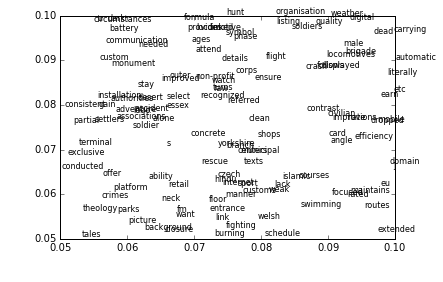

In [11]:
labels = model.vocab[1000:5000]
for label, x, y in zip(labels, model.vectors[1000:5000,0], model.vectors[1000:5000,1]):
    plt.annotate(
        label, 
        xy = (x, y),xytext=(1, 2), textcoords='offset points', fontsize = 8)
plt.axis([0.05,0.1, 0.05, 0.1])
plt.show()

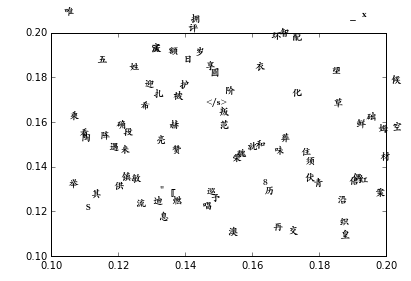

In [14]:
labels_ch = []
from matplotlib import font_manager
zhfont1 = font_manager.FontProperties(fname='/Library/Fonts/Kaiti.ttc')

for label, x, y in zip(model_ch.vocab[:2000], model.vectors[:2000,0], model.vectors[:2000,1]):
    plt.annotate(
        label, 
        xy = (x, y),xytext=(10, 20), textcoords='offset points',fontproperties=zhfont1)
plt.axis([0.1, 0.2, 0.1, 0.2])
plt.show()